# Avaliação de desempenho

## Imports

In [8]:
import pandas as pd
import numpy as np
import json


## Parâmetros e configurações

In [76]:
level = 'l2'
path_acc = 'dados/sa23z_acc_mapbiomas_80_2022.csv'
path_class_settings = 'dados/config_classes.json'
path_strata = 'dados/strata.csv'

In [77]:
def saveHTML(df_style):
    file = open ('tmp/saida.html','w')
    file.write(df_style.to_html())
    file.close()

as classes ignoradas originalmente no repositorio [0, 31, 32, 30, 25, 23, 5, 29]

In [78]:
IGNORED_CLASSES = [0,6,9,25,32, 50]
#IGNORED_CLASSES = [0]
ALL_CLASSES = {
    0: {
        "l1_val": 0,
        "l1": "6. Não Observado",
        "l2_val": 0,
        "l2": "6. Não Observado",
        "l3_val": 0,
        "l3": "6. Não Observado"
    },
    3: {
        "l1_val": 1,
        "l1": "1. Floresta",
        "l2_val": 3,
        "l2": "1.1. Formação Florestal",
        "l3_val": 3,
        "l3": "1.1. Formação Florestal"
    },
    4: {
        "l1_val": 1,
        "l1": "1. Floresta",
        "l2_val": 4,
        "l2": "1.2. Formação Savânica",
        "l3_val": 4,
        "l3": "1.2. Formação Savânica"
    },
    5: {
        "l1_val": 1,
        "l1": "1. Floresta",
        "l2_val": 5,
        "l2": "1.3. Mangue",
        "l3_val": 5,
        "l3": "1.3. Mangue"
    },
    6: {"l1_val": 1, "l1": "1. Floresta", "l2_val": 6, "l2": "1.4. Floresta Alagável (beta)", "l3_val": 6, "l3": "1.4. Floresta Alagável (beta)"},
    9: {
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 9,
        "l2": "3.3. Floresta Plantada",
        "l3_val": 9,
        "l3": "3.3. Floresta Plantada"
    },
    11: {
        "l1_val": 10,
        "l1": "2. Formação Natural não Florestal",
        "l2_val": 11,
        "l2": "2.1. Campo Alagado e Área Pantanosa",
        "l3_val": 11,
        "l3": "2.1. Campo Alagado e Área Pantanosa"
    },
    12: {
        "l1_val": 10,
        "l1": "2. Formação Natural não Florestal",
        "l2_val": 12,
        "l2": "2.2. Formação Campestre (Campo)",
        "l3_val": 12,
        "l3": "2.2. Formação Campestre (Campo)"
    },
    13: {
        "l1_val": 10,
        "l1": "2. Formação Natural não Florestal",
        "l2_val": 13,
        "l2": "2.6. Outra Formação não Florestal",
        "l3_val": 13,
        "l3": "2.6. Outra Formação não Florestal"
    },
    15: {
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 15,
        "l2": "3.1. Pastagem",
        "l3_val": 15,
        "l3": "3.1. Pastagem"
    },
    19: {
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 18,
        "l2": "3.2. Agricultura",
        "l3_val": 19,
        "l3": "3.2.1. Lavoura Temporária"
    },
   
    20: { 
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 18,
        "l2": "3.2. Agricultura",
        "l3_val": 19,
        "l3": "3.2.1. Lavoura Temporária"
    },
    21: {
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 21,
        "l2": "3.4. Mosaico de Usos",
        "l3_val": 21,
        "l3": "3.4. Mosaico de Usos"
    },
    23: {
        "l1_val": 22,
        "l1": "4. Área não Vegetada",
        "l2_val": 23,
        "l2": "4.1. Praia e Duna",
        "l3_val": 23,
        "l3": "4.1. Praia e Duna"
    },
    24: {
        "l1_val": 22,
        "l1": "4. Área não Vegetada",
        "l2_val": 24,
        "l2": "4.2. Infraestrutura Urbana",
        "l3_val": 24,
        "l3": "4.2. Infraestrutura Urbana"
    },
    25: {
        "l1_val": 22,
        "l1": "4. Área não Vegetada",
        "l2_val": 25,
        "l2": "4.4. Outra Área não Vegetada",
        "l3_val": 25,
        "l3": "4.4. Outra Área não Vegetada"
    },
    29: {
        "l1_val": 10,
        "l1": "2. Formação Natural não Florestal",
        "l2_val": 29,
        "l2": "2.4. Afloramento Rochoso",
        "l3_val": 29,
        "l3": "2.4. Afloramento Rochoso"
    },
    30: {
        "l1_val": 22,
        "l1": "4. Área não Vegetada",
        "l2_val": 30,
        "l2": "4.3. Mineração",
        "l3_val": 30,
        "l3": "4.3. Mineração"
    },
    31: {
        "l1_val": 26,
        "l1": "5. Corpo D'água",
        "l2_val": 63,
        "l2": "5.2. Corpos D'Água Artificiais",
        "l3_val": 31,
        "l3": "5.2. Aquicultura"
    },
    32: {
        "l1_val": 10,
        "l1": "2. Formação Natural não Florestal",
        "l2_val": 32,
        "l2": "2.3. Apicum",
        "l3_val": 32,
        "l3": "2.3. Apicum"
    },
    33: {
        "l1_val": 26,
        "l1": "5. Corpo D'água",
        "l2_val": 33,
        "l2": "5.1. Rio, Lago e Oceano",
        "l3_val": 33,
        "l3": "5.1. Rio, Lago e Oceano"
    },
    36: {
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 18,
        "l2": "3.2. Agricultura",
        "l3_val": 36,
        "l3": "3.2.2. Lavoura Perene"
    },
    39: {
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 18,
        "l2": "3.2. Agricultura",
        "l3_val": 19,
        "l3": "3.2.1. Lavoura Temporária",
        #"l4_val": 39,
        #"l4": "3.2.2.1. Soja"
    },
    40: {
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 18,
        "l2": "3.2. Agricultura",
        "l3_val": 19,
        "l3": "3.2.1. Lavoura Temporária",
        #"l4_val": 40,
        #"l4": "3.2.2.3. Arroz"
    },
    41: {
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 18,
        "l2": "3.2. Agricultura",
        "l3_val": 19,
        "l3": "3.2.1. Lavoura Temporária",
        #"l4_val": 41,
        #"l4": "3.2.1.3. Outras Lavouras Temporárias"
    },
    46: {
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 18,
        "l2": "3.2. Agricultura",
        "l3_val": 19,
        "l3": "3.2.1. Lavoura Temporária",
        #"l4_val": 46,
        #"l4": "3.2.1.1. Café"
    },
    47: {
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 18,
        "l2": "3.2. Agricultura",
        "l3_val": 19,
        "l3": "3.2.1. Lavoura Temporária",
        #"l4_val": 47,
        #"l4": "3.2.1.2. Citrus"
    },
    48: {
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 18,
        "l2": "3.2. Agricultura",
        "l3_val": 19,
        "l3": "3.2.1. Lavoura Temporária",
        #"l4_val": 48,
        #"l4": " 3.2.2.3. Outras Lavoura Perene"
    },
    49: {
        "l1_val": 1,
        "l1": "1. Floresta",
        "l2_val": 2,
        "l2": "1.4. Restinga Florestal",
        "l3_val": 49,
        "l3": "1.4. Restinga Florestal"
    },
    50: {
        "l1_val": 10,
        "l1": "2. Formação Natural não Florestal",
        "l2_val": 50,
        "l2": "2.5. Restinga Herbácea/Arbustiva",
        "l3_val": 50,
        "l3": "2.5. Restinga Herbácea/Arbustiva"
    },
    62: {
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 18,
        "l2": "3.2. Agricultura",
        "l3_val": 19,
        "l3": "3.2.1. Lavoura Temporária",
        #"l4_val": 62,
        #"l4": "3.2.1.4. Algodão (beta)"
    },
    63: {
        "l1_val": 26,
        "l1": "5. Corpo D'água",
        "l2_val": 63,
        "l2": "5.2. Corpos D'Água Artificiais",
        "l3_val": 63,
        "l3": "5.2. Corpos D'Água Artificiais"
    },
}

## Entrada de dados

Arquivo com os dados de classificação e os dados de referencia de 2022, gerado no google earth engine:

https://code.earthengine.google.com/365963f4785378c21da4b24fa43061fb

so adicionado como limite o grupode de cartas SA-23-Z

In [197]:
df_acc = pd.read_csv(path_acc)
df_acc.head()

,system:index,AMOSTRAS,AMOSTRA_AM,BioNB,CARTA_2,CLASS_2022,DECLIVIDAD,LAT,LON,NEW_PROB,NEW_WEIGHT,PESO_VOT,PROB_AMOS2,StateNB,TARGETID,VAL_PESO,classification,reference,year,.geo
0,0000000000000000508d_0,NaN,0,1,SA-23-Z,APICUM,D2,-2.368226,-43.544883,0.000011,55301.697925,0.000014,0.000014,21.0,12037,1.0,3,32,2022,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,00000000000000004b0e_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.951507,-44.961886,0.000012,60305.967634,0.000014,0.000014,21.0,16624,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,00000000000000004b0f_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.691714,-44.849776,0.000012,60305.967634,0.000014,0.000014,21.0,16625,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,00000000000000004b1b_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.823672,-44.723653,0.000012,60305.967634,0.000014,0.000014,21.0,16656,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,00000000000000004b26_0,Treinamento,1,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.720550,-44.673527,0.000012,60305.967634,0.000014,0.000014,21.0,16694,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}"


apenas as amostras SA23-Z

In [198]:
df_acc.shape

(712, 20)

Configuracao com as classes, comentei para usar identico ao do repositorio

In [199]:
#with open(path_class_settings, 'r') as arquivo:
    #config_classes = json.load(arquivo)
#config_classes['IGNORED_CLASSES']

Para não ignorar essas classes:

In [200]:
#config_classes['IGNORED_CLASSES'] = [0]
#config_classes['IGNORED_CLASSES']

Aqui, não irei usar o arquivo points_strata.csv, pois os dados do target_id estao errados na coleção das amostras

pegarei apenas o dadoq que tem a populacao por estrato

In [201]:
df_strata = pd.read_csv(path_strata)
df_strata.head()

,strata_id,pop
0,SH-21-Z_D1,22049360.0
1,SI-22-V_D1,19367713.0
2,SF-24-V_D1,4483278.0
3,SF-23-Z_D1,3193040.0
4,SC-24-Z_D1,18863275.0


In [202]:
df_strata.shape ## todas os estratos

(762, 2)

## Tratamento de dados

### Gerando a coluna strata_id

como os estrato id estao errados nos dados que tive acesso no mapbiomas, vou criar o estrato id com base no dado do estrato e da declividade

In [203]:
df_acc['strata_id'] = df_acc["CARTA_2"] + "_" + df_acc["DECLIVIDAD"]

verificando os estratos

In [204]:
df_acc["strata_id"].unique()

array(['SA-23-Z_D2', 'SA-23-Z_D1', 'SA-23-Z_D3', 'SA-23-Z_D4',
       'SA-23-Z_D6', 'SA-23-Z_D5'], dtype=object)

### Pegando os dados dado da populacao

In [205]:
df_acc = pd.merge(df_acc, df_strata, how='inner', on="strata_id")
df_acc.head()

,system:index,AMOSTRAS,AMOSTRA_AM,BioNB,CARTA_2,CLASS_2022,DECLIVIDAD,LAT,LON,NEW_PROB,...,PROB_AMOS2,StateNB,TARGETID,VAL_PESO,classification,reference,year,.geo,strata_id,pop
0,0000000000000000508d_0,NaN,0,1,SA-23-Z,APICUM,D2,-2.368226,-43.544883,0.000011,...,0.000014,21.0,12037,1.0,3,32,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D2,27861902.0
1,00000000000000004b0e_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.951507,-44.961886,0.000012,...,0.000014,21.0,16624,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0
2,00000000000000004b0f_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.691714,-44.849776,0.000012,...,0.000014,21.0,16625,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0
3,00000000000000004b1b_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.823672,-44.723653,0.000012,...,0.000014,21.0,16656,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0
4,00000000000000004b26_0,Treinamento,1,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.720550,-44.673527,0.000012,...,0.000014,21.0,16694,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0


In [206]:
df_acc['pop'].head()

0    27861902.0
1    25366123.0
2    25366123.0
3    25366123.0
4    25366123.0
Name: pop, dtype: float64

### Pegando a quantidade de amostras por estrato

contar a quantidade de amostras por estrato

<Axes: ylabel='strata_id'>

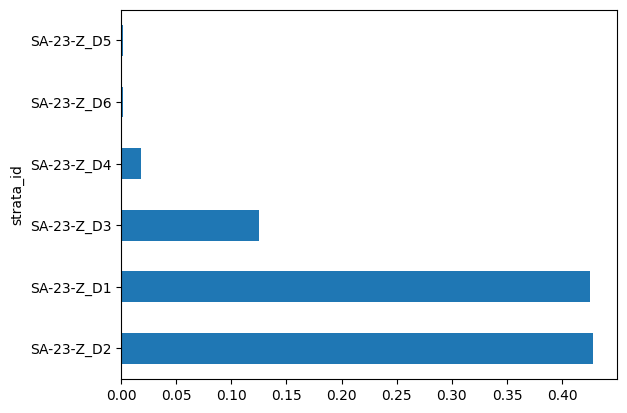

In [207]:
df_acc['strata_id'].value_counts(normalize=True).plot(kind='barh')

In [208]:
df_qt_samples = df_acc['strata_id'].value_counts().reset_index(name='n_samp')
df_qt_samples

,strata_id,n_samp
0,SA-23-Z_D2,305
1,SA-23-Z_D1,303
2,SA-23-Z_D3,89
3,SA-23-Z_D4,13
4,SA-23-Z_D6,1
5,SA-23-Z_D5,1


In [209]:
df_qt_samples.sum()

strata_id    SA-23-Z_D2SA-23-Z_D1SA-23-Z_D3SA-23-Z_D4SA-23-...
n_samp                                                     712
dtype: object

depois plotar um mapa os pontos por estrato

In [210]:
df_acc = pd.merge(df_acc, df_qt_samples, on='strata_id')
df_acc.head()

,system:index,AMOSTRAS,AMOSTRA_AM,BioNB,CARTA_2,CLASS_2022,DECLIVIDAD,LAT,LON,NEW_PROB,...,StateNB,TARGETID,VAL_PESO,classification,reference,year,.geo,strata_id,pop,n_samp
0,0000000000000000508d_0,NaN,0,1,SA-23-Z,APICUM,D2,-2.368226,-43.544883,0.000011,...,21.0,12037,1.0,3,32,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D2,27861902.0,305
1,00000000000000004b0e_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.951507,-44.961886,0.000012,...,21.0,16624,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303
2,00000000000000004b0f_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.691714,-44.849776,0.000012,...,21.0,16625,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303
3,00000000000000004b1b_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.823672,-44.723653,0.000012,...,21.0,16656,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303
4,00000000000000004b26_0,Treinamento,1,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.720550,-44.673527,0.000012,...,21.0,16694,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303


verificar se esta ok numero de amostras e populacao

In [211]:
df_acc.columns

Index(['system:index', 'AMOSTRAS', 'AMOSTRA_AM', 'BioNB', 'CARTA_2',
       'CLASS_2022', 'DECLIVIDAD', 'LAT', 'LON', 'NEW_PROB', 'NEW_WEIGHT',
       'PESO_VOT', 'PROB_AMOS2', 'StateNB', 'TARGETID', 'VAL_PESO',
       'classification', 'reference', 'year', '.geo', 'strata_id', 'pop',
       'n_samp'],
      dtype='object')

In [212]:
df_contagem = df_acc.groupby("strata_id")[['n_samp','pop', 'PROB_AMOS2']].first()
df_contagem

,n_samp,pop,PROB_AMOS2
strata_id,,,
SA-23-Z_D1,303,25366123.0,0.000014
SA-23-Z_D2,305,27861902.0,0.000014
SA-23-Z_D3,89,7842002.0,0.000014
SA-23-Z_D4,13,1111132.0,0.000014
SA-23-Z_D5,1,4130.0,0.000242
SA-23-Z_D6,1,2744.0,0.000364


checando a probabilidade

In [213]:
df_contagem["prob_calc"] = df_contagem['n_samp'] / df_contagem['pop']
df_contagem

,n_samp,pop,PROB_AMOS2,prob_calc
strata_id,,,,
SA-23-Z_D1,303,25366123.0,0.000014,0.000012
SA-23-Z_D2,305,27861902.0,0.000014,0.000011
SA-23-Z_D3,89,7842002.0,0.000014,0.000011
SA-23-Z_D4,13,1111132.0,0.000014,0.000012
SA-23-Z_D5,1,4130.0,0.000242,0.000242
SA-23-Z_D6,1,2744.0,0.000364,0.000364


In [214]:
df_contagem.sum()

n_samp        7.120000e+02
pop           6.218803e+07
PROB_AMOS2    6.632598e-04
prob_calc     6.525031e-04
dtype: float64

### Atualiza o nome dos biomas, para texto

In [215]:
df_acc.loc[ (df_acc['BioNB']==1),'BioNB'] = 'Amazônia'
df_acc.loc[ (df_acc['BioNB']==2),'BioNB'] = 'Mata Atlântica'
df_acc.loc[ (df_acc['BioNB']==3),'BioNB'] = 'Pantanal'
df_acc.loc[ (df_acc['BioNB']==4),'BioNB'] = 'Cerrado'
df_acc.loc[ (df_acc['BioNB']==5),'BioNB'] = 'Caatinga'
df_acc.loc[ (df_acc['BioNB']==6),'BioNB'] = 'Pampa'

/tmp/ipykernel_144060/3599183855.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Amazônia' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_acc.loc[ (df_acc['BioNB']==1),'BioNB'] = 'Amazônia'


In [216]:
df_acc['BioNB'].unique()

array(['Amazônia', 'Cerrado'], dtype=object)

### Atualizando os codigos das classes de acordo com o nivel, e outros ajustes

#### Converte codigos das classe

In [217]:
df_acc['classification'].value_counts().sort_index()

classification
3     290
4     104
5      32
6      29
9       3
11     61
12     10
15     92
21     18
23     14
24     10
25      5
32      5
33     26
39     12
41      1
Name: count, dtype: int64

In [218]:
classif_1 = df_acc['classification'].unique()
classif_1.sort()
classif_1

array([ 3,  4,  5,  6,  9, 11, 12, 15, 21, 23, 24, 25, 32, 33, 39, 41])

In [219]:
df_acc['reference'].value_counts().sort_index()

reference
3     300
4     117
5      17
9       4
11     59
12     22
15    115
19     14
23     18
24     10
25      1
32      3
33     20
50     12
Name: count, dtype: int64

In [220]:
reference_1 = df_acc['reference'].unique()
reference_1.sort()
reference_1

array([ 3,  4,  5,  9, 11, 12, 15, 19, 23, 24, 25, 32, 33, 50])

Observando a classificacao e a reference, observamos algumas classes que aparece em uma e nao na outra, porém a funcao de convert_class corrige algumas, provavelmente pq mudaram se os codigos de algumas destas. pesquisar melhor


classificacao

6 - Floresta Alagável (nivel 2)

21 - mosaico de usos (nivel 2)

39 - Soja (nivel 3)

41 - Outras Lavouras Temporárias (nivel 3)

reference

19 - Lavoura Temporária (nivel 3)

50 - Restinga Herbácea

In [221]:
def convert_class(df):

    #Global

    df.loc[ (df['classification'] == 20) | (df['classification'] == 39) | (df['classification'] == 40) | (df['classification'] == 41) | (df['classification'] == 62), 'classification'] = 19 #Convert areas mapped as 20,39,40,41 to 19
    df.loc[ (df['classification'] == 46) | (df['classification'] == 47) | (df['classification'] == 48), 'classification'] = 36 #Convert areas mapped as 46,47,48 to 36
    df.loc[ (df['classification'] == 51) | (df['classification'] == 52) | (df['classification'] == 53), 'classification'] = 24 #Convert areas mapped as 20,39,41 to 24
    df.loc[ (df['classification'] == 49), 'classification'] = 3 #Convert areas mapped as 54,55,56 to 33
    df.loc[ (df['classification'] == 50), 'classification'] = 13 #Convert areas mapped as 54,55,56 to 33
    df.loc[ (df['classification'] == 54) | (df['classification'] == 55) | (df['classification'] == 56), 'classification'] = 33 #Convert areas mapped as 54,55,56 to 33
    df.loc[ (df['classification'] == 21) & (df['reference'].isin([15,19,20,36])), 'reference'] = 21 #Convert reference from 15,19,20,36 to reference 21 for areas mapped as 21
    df.loc[ (df['classification'] == 63), 'classification'] = 33    

    #Pampa 

    df.loc[ (df['BioNB']== 'Pampa') & (df['reference'] == 15),'reference'] = 19 #In Pampa, convert reference class 15 to 19 (Crop).
    df.loc[ (df['BioNB']=='Pampa') & (df['classification'] == 25) & (df['reference'] == 23), 'reference'] = 25 #In Pampa, convert reference 25 to 23 in areas mapped as 25
    df.loc[ (df['BioNB']== 'Pampa') & (df['classification'] == 12) & (df['reference'] == 13),'reference'] = 12 #In Pampa, convert reference 13 to 12 in areas mapped as 12
    df.loc[ (df['BioNB']== 'Pampa') & (df['classification'] == 13),'classification'] = 12 #In Pampa, convert reference 13 to 12 in areas mapped as 12

    #Mata Atântica

    df.loc[ (df['BioNB']== 'Mata Atlântica') & (df['classification'] == 11) & (df['reference'] == 13),'reference'] = 11

    #Pantanal

    df.loc[ (df['BioNB']== 'Pantanal') & (df['classification'] == 11) & (df['reference'] == 12),'reference'] = 11 #In Pantanal, convert reference 12 to 11 in areas mapped as 11
    df.loc[ (df['BioNB']== 'Pantanal') & (df['classification'] == 11) & (df['reference'] == 33),'reference'] = 11 #In Pantanal, convert reference 33 to 11 in areas mapped as 11
    df.loc[ (df['BioNB']== 'Pantanal') & (df['classification'] == 12) & (df['reference'] == 33),'reference'] = 12 #In Pantanal, convert reference 33 to 12 in areas mapped as 12
    df.loc[ (df['BioNB']== 'Pantanal') & (df['classification'] == 12) & (df['reference'] == 11),'reference'] = 12 #NEW!#In Pantanal, convert reference 33 to 12 in areas mapped as 12
    df.loc[ (df['BioNB']== 'Pantanal') & (df['classification'] == 33) & (df['reference'] == 11),'classification'] = 11 #In Pantanal, convert reference 33 to 11 in areas mapped as 11
    df.loc[ (df['BioNB']== 'Pantanal') & (df['classification'] == 33) & (df['reference'] == 12),'classification'] = 12 #In Pantanal, convert reference 33 to 12 in areas mapped as 12

    #Amazônia

    df.loc[ (df['BioNB']=='Amazônia') & (df['classification'] == 12) & (df['reference'] == 13), 'reference'] = 12 #In Amazon, convert reference 13 to 12 in areas mapped as 12
    df.loc[ (df['BioNB']=='Amazônia') & (df['classification'] == 4) & (df['reference'] == 13), 'reference'] = 4 #In Amazon, convert reference 13 to 4 in areas mapped as 4

    #Cerrado

    df.loc[ (df['BioNB']=='Cerrado') & (df['reference'] == 11),'reference'] = 12
    df.loc[ (df['BioNB']=='Cerrado') & (df['classification'] == 11),'classification'] = 12 
    df.loc[ (df['BioNB']=='Cerrado') & (df['classification'] == 12)  & (df['reference'] == 13), 'reference'] = 12 #In Cerrado, convert reference 13 to 12 in areas mapped as 12
    df.loc[ (df['BioNB']=='Cerrado') & (df['classification'] == 25) & (df['reference'] == 23), 'reference'] = 25 #In Cerrado, convert reference 25 to 23 in areas mapped as 25

    return df

In [222]:
df_acc = convert_class(df_acc)

#### Verificando se mudou alguma classe

In [223]:
df_acc['classification'].value_counts().sort_index()

classification
3     290
4     104
5      32
6      29
9       3
11     59
12     12
15     92
19     13
21     18
23     14
24     10
25      5
32      5
33     26
Name: count, dtype: int64

In [224]:
classif_2 = df_acc['classification'].unique()
classif_2.sort()
classif_2

array([ 3,  4,  5,  6,  9, 11, 12, 15, 19, 21, 23, 24, 25, 32, 33])

In [225]:
print (classif_1)
print (classif_2)

[ 3  4  5  6  9 11 12 15 21 23 24 25 32 33 39 41]
[ 3  4  5  6  9 11 12 15 19 21 23 24 25 32 33]


In [226]:
np.setdiff1d (classif_1 , classif_2)

array([39, 41])

as classes 39 e 41 viram 19, afetaria o nivel 3, pois soja e Outras Lavouras Temporárias viram lavoura temporaria no nivel 2

In [227]:
np.setdiff1d (classif_2 , classif_1)

array([19])

In [228]:
df_acc['reference'].value_counts().sort_index()

reference
3     300
4     117
5      17
9       4
11     55
12     26
15    106
19     13
21     10
23     14
24     10
25      5
32      3
33     20
50     12
Name: count, dtype: int64

In [229]:
reference_2 = df_acc['reference'].unique()
reference_2.sort()
reference_2


array([ 3,  4,  5,  9, 11, 12, 15, 19, 21, 23, 24, 25, 32, 33, 50])

In [230]:
print (reference_1)
print (reference_2)

[ 3  4  5  9 11 12 15 19 23 24 25 32 33 50]
[ 3  4  5  9 11 12 15 19 21 23 24 25 32 33 50]


In [231]:
np.setdiff1d (reference_1 , reference_2)

array([], dtype=int64)

In [232]:
np.setdiff1d (reference_2 , reference_1)

array([21])

Observando a classificacao e a reference, observamos algumas classes que aparece em uma e nao na outra:

- 50 - Restinga Herbácea aparece apenas na referencia
- 6 - Floresta Alagável aparece apenas na classificacao

#### Atualizando os codigo por nível

mudei o codigo original, agora eu pego todas as classes, nao apenas as que aparece em ambos

codigo do repositorio

In [233]:
def get_classes(df, level='l3'):

    class_values = {}
    class_names = {}

    clas_classes = pd.Index(df['classification'].unique())
    ref_classes = pd.Index(df['reference'].unique())

    # não sei se deveria pegar so os que estao em comum, mas para nao mexer muito, vou deixar
    acc_classes =clas_classes.intersection(ref_classes)
    #acc_classes =clas_classes.union(ref_classes)

    val_remap = {}

    for value in ALL_CLASSES.keys():
        if (value not in IGNORED_CLASSES and (value in acc_classes)):
            
            val_key = "%s_val" % (level)
            new_val = ALL_CLASSES[value][val_key]
            class_name = ALL_CLASSES[value][level]

            val_remap[value] = new_val
            class_values[new_val] = True
            class_names[class_name] = True

    df = df[df['classification'].isin(val_remap.keys())]
    df = df[df['reference'].isin(val_remap.keys())]

    df['classification'] = df['classification'].map(val_remap)
    df['reference'] = df['reference'].map(val_remap)

    class_values = list(class_values.keys())
    class_names = list(class_names.keys())

    return df, class_values, class_names

In [234]:
##df_acc, class_values, class_names = get_classes(df_acc, config_classes, level)
df_acc, class_values, class_names = get_classes(df_acc, level)
df_acc.head()

,system:index,AMOSTRAS,AMOSTRA_AM,BioNB,CARTA_2,CLASS_2022,DECLIVIDAD,LAT,LON,NEW_PROB,...,StateNB,TARGETID,VAL_PESO,classification,reference,year,.geo,strata_id,pop,n_samp
1,00000000000000004b0e_0,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.951507,-44.961886,0.000012,...,21.0,16624,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303
3,00000000000000004b1b_0,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.823672,-44.723653,0.000012,...,21.0,16656,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303
5,00000000000000004b2f_0,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.127662,-44.787253,0.000012,...,21.0,16709,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303
6,00000000000000004b34_0,Treinamento,1,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.696471,-44.734432,0.000012,...,21.0,16717,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303
7,00000000000000004b36_0,Treinamento,1,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.555350,-44.806927,0.000012,...,21.0,16720,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303


In [235]:
df_acc.shape

(655, 23)

In [236]:
len(class_names)

11

#### Verificando se as classes mudaram

In [237]:
reference_3 = df_acc['reference'].unique()
reference_3.sort()
reference_3

classif_3 = df_acc['classification'].unique()
classif_3.sort()
classif_3

print (reference_2)
print (reference_3)
print ('-----')
print (classif_2)
print (classif_3)

[ 3  4  5  9 11 12 15 19 21 23 24 25 32 33 50]
[ 3  4  5 11 12 15 18 21 23 24 33]
-----
[ 3  4  5  6  9 11 12 15 19 21 23 24 25 32 33]
[ 3  4  5 11 12 15 18 21 23 24 33]


#### Pegando os dados das classes

In [238]:
df_by_class = pd.DataFrame ( {
    'Class_Names' : class_names,
    'Class_Values' : class_values
}).set_index('Class_Values')
df_by_class

,Class_Names
Class_Values,
3,1.1. Formação Florestal
4,1.2. Formação Savânica
5,1.3. Mangue
11,2.1. Campo Alagado e Área Pantanosa
12,2.2. Formação Campestre (Campo)
15,3.1. Pastagem
18,3.2. Agricultura
21,3.4. Mosaico de Usos
23,4.1. Praia e Duna


In [239]:
df_by_class['qt_class'] = df_acc['classification'].value_counts()
df_by_class

,Class_Names,qt_class
Class_Values,,
3,1.1. Formação Florestal,289
4,1.2. Formação Savânica,93
5,1.3. Mangue,32
11,2.1. Campo Alagado e Área Pantanosa,59
12,2.2. Formação Campestre (Campo),10
15,3.1. Pastagem,92
18,3.2. Agricultura,13
21,3.4. Mosaico de Usos,18
23,4.1. Praia e Duna,14


In [240]:
df_by_class['qt_reference'] = df_acc['reference'].value_counts()

In [241]:
df_by_class

,Class_Names,qt_class,qt_reference
Class_Values,,,
3,1.1. Formação Florestal,289,282
4,1.2. Formação Savânica,93,117
5,1.3. Mangue,32,15
11,2.1. Campo Alagado e Área Pantanosa,59,47
12,2.2. Formação Campestre (Campo),10,25
15,3.1. Pastagem,92,102
18,3.2. Agricultura,13,13
21,3.4. Mosaico de Usos,18,10
23,4.1. Praia e Duna,14,14


resultado, quando modifiquei o get class, so perdi os dados da floresta alagavel e restinga

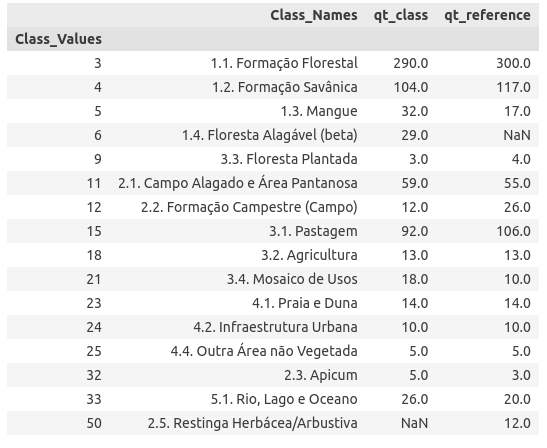

In [242]:
712 - (12+29)

671

aqui, vou substituir os nas por zero, ja que é zero a quantidade de classificados

In [243]:
df_by_class.fillna(0, inplace=True)
df_by_class

,Class_Names,qt_class,qt_reference
Class_Values,,,
3,1.1. Formação Florestal,289,282
4,1.2. Formação Savânica,93,117
5,1.3. Mangue,32,15
11,2.1. Campo Alagado e Área Pantanosa,59,47
12,2.2. Formação Campestre (Campo),10,25
15,3.1. Pastagem,92,102
18,3.2. Agricultura,13,13
21,3.4. Mosaico de Usos,18,10
23,4.1. Praia e Duna,14,14


In [244]:
df_by_class.sort_values('qt_class', ascending=False)

,Class_Names,qt_class,qt_reference
Class_Values,,,
3,1.1. Formação Florestal,289,282
4,1.2. Formação Savânica,93,117
15,3.1. Pastagem,92,102
11,2.1. Campo Alagado e Área Pantanosa,59,47
5,1.3. Mangue,32,15
33,"5.1. Rio, Lago e Oceano",26,20
21,3.4. Mosaico de Usos,18,10
23,4.1. Praia e Duna,14,14
18,3.2. Agricultura,13,13


In [245]:
df_by_class[['qt_class','qt_reference']].sum(axis=0)

qt_class        655
qt_reference    655
dtype: int64

#### Formatacao

In [246]:
df_by_class_formatar = df_by_class.copy(deep=True)

In [247]:
df_by_class_formatar.columns = ['Classe', 'Quantidade Classificada', 'Quantidade de Referência']
df_by_class_formatar.index.name = 'id'

In [248]:
df_by_class_formatar

,Classe,Quantidade Classificada,Quantidade de Referência
id,,,
3,1.1. Formação Florestal,289,282
4,1.2. Formação Savânica,93,117
5,1.3. Mangue,32,15
11,2.1. Campo Alagado e Área Pantanosa,59,47
12,2.2. Formação Campestre (Campo),10,25
15,3.1. Pastagem,92,102
18,3.2. Agricultura,13,13
21,3.4. Mosaico de Usos,18,10
23,4.1. Praia e Duna,14,14


In [249]:
df_by_class_formatar.loc[[3,4]]['Quantidade Classificada'].sum() / df_by_class_formatar['Quantidade Classificada'].sum()

np.float64(0.583206106870229)

<Axes: ylabel='id'>

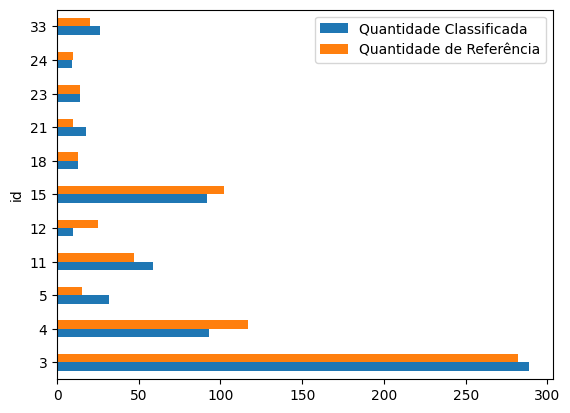

In [250]:
df_by_class_formatar.plot(kind='barh')

In [251]:
#s_by_class = df_by_class_formatar.sort_values('Quantidade Classificada', ascending=False).style
s_by_class = df_by_class_formatar.style
s_by_class

,Classe,Quantidade Classificada,Quantidade de Referência
id,,,
3,1.1. Formação Florestal,289,282
4,1.2. Formação Savânica,93,117
5,1.3. Mangue,32,15
11,2.1. Campo Alagado e Área Pantanosa,59,47
12,2.2. Formação Campestre (Campo),10,25
15,3.1. Pastagem,92,102
18,3.2. Agricultura,13,13
21,3.4. Mosaico de Usos,18,10
23,4.1. Praia e Duna,14,14


In [252]:
s_by_class.format ({
    'Quantidade Classificada' : '{:.0f}',
    'Quantidade de Referência' : '{:.0f}'
})

,Classe,Quantidade Classificada,Quantidade de Referência
id,,,
3,1.1. Formação Florestal,289,282
4,1.2. Formação Savânica,93,117
5,1.3. Mangue,32,15
11,2.1. Campo Alagado e Área Pantanosa,59,47
12,2.2. Formação Campestre (Campo),10,25
15,3.1. Pastagem,92,102
18,3.2. Agricultura,13,13
21,3.4. Mosaico de Usos,18,10
23,4.1. Praia e Duna,14,14


In [253]:
file = open ('tmp/saida.html','w')
file.write(s_by_class.to_html())
file.close()

## Analise da acuracia

### Preparação das variáveis usadas para calcular

In [1176]:
from sklearn.metrics import confusion_matrix

In [1177]:
y_true = df_acc[['reference']].to_numpy().flatten()
y_pred = df_acc[['classification']].to_numpy().flatten()

verificar se existe classes em uma e nao na outra

In [1178]:
set(y_pred) - set (y_true)

set()

In [1179]:
set(y_true) - set (y_pred)

set()

In [1180]:
matrix_sem_peso = confusion_matrix(y_true, y_pred).T
print (matrix_sem_peso)

[[225  34   1   0   3  23   1   0   0   0   2]
 [ 12  69   0   0   4   8   0   0   0   0   0]
 [ 18   0  14   0   0   0   0   0   0   0   0]
 [  8   0   0  38   7   6   0   0   0   0   0]
 [  0   6   0   0   1   2   0   0   0   0   1]
 [ 16   4   0   3   6  61   0   0   0   2   0]
 [  0   0   0   0   0   1  12   0   0   0   0]
 [  1   4   0   0   3   0   0  10   0   0   0]
 [  0   0   0   0   0   0   0   0  14   0   0]
 [  0   0   0   0   0   1   0   0   0   8   0]
 [  2   0   0   6   1   0   0   0   0   0  17]]


In [1181]:
matrix_sem_peso.diagonal().sum() / matrix_sem_peso.sum()

np.float64(0.716030534351145)

In [1182]:
total = matrix_sem_peso.sum()
total

np.int64(655)

In [1183]:
classes_index = list (set(y_true).union(set (y_pred)))
classes_index

[np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(11),
 np.int64(12),
 np.int64(15),
 np.int64(18),
 np.int64(21),
 np.int64(23),
 np.int64(24),
 np.int64(33)]

In [1184]:
df_matriz_confusao_qt = pd.DataFrame(matrix_sem_peso, index=classes_index, columns=classes_index)

#### Formatacao para artigo

In [1185]:
df_matriz_confusao_qt['Tot'] = df_matriz_confusao_qt.sum(axis=1)
df_matriz_confusao_qt

,3,4,5,11,12,15,18,21,23,24,33,Tot
3,225,34,1,0,3,23,1,0,0,0,2,289
4,12,69,0,0,4,8,0,0,0,0,0,93
5,18,0,14,0,0,0,0,0,0,0,0,32
11,8,0,0,38,7,6,0,0,0,0,0,59
12,0,6,0,0,1,2,0,0,0,0,1,10
15,16,4,0,3,6,61,0,0,0,2,0,92
18,0,0,0,0,0,1,12,0,0,0,0,13
21,1,4,0,0,3,0,0,10,0,0,0,18
23,0,0,0,0,0,0,0,0,14,0,0,14
24,0,0,0,0,0,1,0,0,0,8,0,9


In [1186]:
df_matriz_confusao_qt.loc['Tot'] = df_matriz_confusao_qt.sum(axis=0)

In [1187]:
df_matriz_confusao_qt

,3,4,5,11,12,15,18,21,23,24,33,Tot
3,225,34,1,0,3,23,1,0,0,0,2,289
4,12,69,0,0,4,8,0,0,0,0,0,93
5,18,0,14,0,0,0,0,0,0,0,0,32
11,8,0,0,38,7,6,0,0,0,0,0,59
12,0,6,0,0,1,2,0,0,0,0,1,10
15,16,4,0,3,6,61,0,0,0,2,0,92
18,0,0,0,0,0,1,12,0,0,0,0,13
21,1,4,0,0,3,0,0,10,0,0,0,18
23,0,0,0,0,0,0,0,0,14,0,0,14
24,0,0,0,0,0,1,0,0,0,8,0,9


In [1188]:
style_matriz_peso_qt = df_matriz_confusao_qt.style
style_matriz_peso_qt

,3,4,5,11,12,15,18,21,23,24,33,Tot
3,225,34,1,0,3,23,1,0,0,0,2,289
4,12,69,0,0,4,8,0,0,0,0,0,93
5,18,0,14,0,0,0,0,0,0,0,0,32
11,8,0,0,38,7,6,0,0,0,0,0,59
12,0,6,0,0,1,2,0,0,0,0,1,10
15,16,4,0,3,6,61,0,0,0,2,0,92
18,0,0,0,0,0,1,12,0,0,0,0,13
21,1,4,0,0,3,0,0,10,0,0,0,18
23,0,0,0,0,0,0,0,0,14,0,0,14
24,0,0,0,0,0,1,0,0,0,8,0,9


In [1189]:
style_matriz_peso_qt.apply(lambda x: ['background-color: gray' if x.name == col else '' for col in x.index], axis=1)

,3,4,5,11,12,15,18,21,23,24,33,Tot
3,225,34,1,0,3,23,1,0,0,0,2,289
4,12,69,0,0,4,8,0,0,0,0,0,93
5,18,0,14,0,0,0,0,0,0,0,0,32
11,8,0,0,38,7,6,0,0,0,0,0,59
12,0,6,0,0,1,2,0,0,0,0,1,10
15,16,4,0,3,6,61,0,0,0,2,0,92
18,0,0,0,0,0,1,12,0,0,0,0,13
21,1,4,0,0,3,0,0,10,0,0,0,18
23,0,0,0,0,0,0,0,0,14,0,0,14
24,0,0,0,0,0,1,0,0,0,8,0,9


In [1222]:
file = open ('tmp/saida.html','w')
file.write(style_matriz_peso_qt.to_html())

11851

### Matriz Sem Área

In [1223]:
total, _ = df_acc.shape
total

655

In [1224]:
pd.DataFrame ((confusion_matrix(y_true, y_pred).T) ,  columns=class_names, index=class_names)

,1.1. Formação Florestal,1.2. Formação Savânica,1.3. Mangue,2.1. Campo Alagado e Área Pantanosa,2.2. Formação Campestre (Campo),3.1. Pastagem,3.2. Agricultura,3.4. Mosaico de Usos,4.1. Praia e Duna,4.2. Infraestrutura Urbana,"5.1. Rio, Lago e Oceano"
1.1. Formação Florestal,225,34,1,0,3,23,1,0,0,0,2
1.2. Formação Savânica,12,69,0,0,4,8,0,0,0,0,0
1.3. Mangue,18,0,14,0,0,0,0,0,0,0,0
2.1. Campo Alagado e Área Pantanosa,8,0,0,38,7,6,0,0,0,0,0
2.2. Formação Campestre (Campo),0,6,0,0,1,2,0,0,0,0,1
3.1. Pastagem,16,4,0,3,6,61,0,0,0,2,0
3.2. Agricultura,0,0,0,0,0,1,12,0,0,0,0
3.4. Mosaico de Usos,1,4,0,0,3,0,0,10,0,0,0
4.1. Praia e Duna,0,0,0,0,0,0,0,0,14,0,0
4.2. Infraestrutura Urbana,0,0,0,0,0,1,0,0,0,8,0


In [1225]:
df_matriz = pd.DataFrame ((confusion_matrix(y_true, y_pred).T) / total,  columns=class_names, index=class_names)
df_matriz

,1.1. Formação Florestal,1.2. Formação Savânica,1.3. Mangue,2.1. Campo Alagado e Área Pantanosa,2.2. Formação Campestre (Campo),3.1. Pastagem,3.2. Agricultura,3.4. Mosaico de Usos,4.1. Praia e Duna,4.2. Infraestrutura Urbana,"5.1. Rio, Lago e Oceano"
1.1. Formação Florestal,0.343511,0.051908,0.001527,0.000000,0.004580,0.035115,0.001527,0.000000,0.000000,0.000000,0.003053
1.2. Formação Savânica,0.018321,0.105344,0.000000,0.000000,0.006107,0.012214,0.000000,0.000000,0.000000,0.000000,0.000000
1.3. Mangue,0.027481,0.000000,0.021374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.1. Campo Alagado e Área Pantanosa,0.012214,0.000000,0.000000,0.058015,0.010687,0.009160,0.000000,0.000000,0.000000,0.000000,0.000000
2.2. Formação Campestre (Campo),0.000000,0.009160,0.000000,0.000000,0.001527,0.003053,0.000000,0.000000,0.000000,0.000000,0.001527
3.1. Pastagem,0.024427,0.006107,0.000000,0.004580,0.009160,0.093130,0.000000,0.000000,0.000000,0.003053,0.000000
3.2. Agricultura,0.000000,0.000000,0.000000,0.000000,0.000000,0.001527,0.018321,0.000000,0.000000,0.000000,0.000000
3.4. Mosaico de Usos,0.001527,0.006107,0.000000,0.000000,0.004580,0.000000,0.000000,0.015267,0.000000,0.000000,0.000000
4.1. Praia e Duna,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021374,0.000000,0.000000
4.2. Infraestrutura Urbana,0.000000,0.000000,0.000000,0.000000,0.000000,0.001527,0.000000,0.000000,0.000000,0.012214,0.000000


### Calculo da acuracia

In [1226]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [1227]:
total = df_matriz.sum().sum()
total

np.float64(1.0)

In [1228]:
concordancia = np.diag(df_matriz.values)
concordancia

array([0.34351145, 0.10534351, 0.02137405, 0.05801527, 0.00152672,
       0.09312977, 0.01832061, 0.01526718, 0.02137405, 0.01221374,
       0.0259542 ])

In [1229]:
total_class= df_matriz.sum(axis=1)
total_class

1.1. Formação Florestal                0.441221
1.2. Formação Savânica                 0.141985
1.3. Mangue                            0.048855
2.1. Campo Alagado e Área Pantanosa    0.090076
2.2. Formação Campestre (Campo)        0.015267
3.1. Pastagem                          0.140458
3.2. Agricultura                       0.019847
3.4. Mosaico de Usos                   0.027481
4.1. Praia e Duna                      0.021374
4.2. Infraestrutura Urbana             0.013740
5.1. Rio, Lago e Oceano                0.039695
dtype: float64

In [1230]:
total_ref = df_matriz.sum(axis=0)
total_ref

1.1. Formação Florestal                0.430534
1.2. Formação Savânica                 0.178626
1.3. Mangue                            0.022901
2.1. Campo Alagado e Área Pantanosa    0.071756
2.2. Formação Campestre (Campo)        0.038168
3.1. Pastagem                          0.155725
3.2. Agricultura                       0.019847
3.4. Mosaico de Usos                   0.015267
4.1. Praia e Duna                      0.021374
4.2. Infraestrutura Urbana             0.015267
5.1. Rio, Lago e Oceano                0.030534
dtype: float64

In [1231]:
total_concordancia  = concordancia.sum()
total_concordancia

np.float64(0.716030534351145)

#### Acuracia Global

In [1232]:
AG = total_concordancia
AG

np.float64(0.716030534351145)

#### Erro Global

In [1233]:
EG = 1 - AG
EG

np.float64(0.28396946564885495)

#### Acuracia do consumidor e erros de comissao

In [1234]:
AC = concordancia / total_class
AC.sort_values(ascending=False)

4.1. Praia e Duna                      1.000000
3.2. Agricultura                       0.923077
4.2. Infraestrutura Urbana             0.888889
1.1. Formação Florestal                0.778547
1.2. Formação Savânica                 0.741935
3.1. Pastagem                          0.663043
5.1. Rio, Lago e Oceano                0.653846
2.1. Campo Alagado e Área Pantanosa    0.644068
3.4. Mosaico de Usos                   0.555556
1.3. Mangue                            0.437500
2.2. Formação Campestre (Campo)        0.100000
dtype: float64

aqui estou fazendo o equivalente ao micro

In [1235]:
concordancia.sum() / total_class.sum()

np.float64(0.7160305343511452)

Micro: Calcula a métrica globalmente.
Macro: Calcula a métrica para cada classe e depois tira a média.
Weighted: Calcula a métrica para cada classe e tira a média ponderada pelo suporte de cada classe.

In [1236]:
precision_score(y_true, y_pred, average='micro')

np.float64(0.716030534351145)

In [1237]:
EC = 1 - AC
EC.sort_values(ascending=False)

2.2. Formação Campestre (Campo)        0.900000
1.3. Mangue                            0.562500
3.4. Mosaico de Usos                   0.444444
2.1. Campo Alagado e Área Pantanosa    0.355932
5.1. Rio, Lago e Oceano                0.346154
3.1. Pastagem                          0.336957
1.2. Formação Savânica                 0.258065
1.1. Formação Florestal                0.221453
4.2. Infraestrutura Urbana             0.111111
3.2. Agricultura                       0.076923
4.1. Praia e Duna                      0.000000
dtype: float64

In [1238]:
1 - concordancia.sum() / total_class.sum()

np.float64(0.28396946564885484)

#### Acuracia do produtor e erros de omissao

In [1239]:
AP = concordancia / total_ref
AP.sort_values(ascending=False)

4.1. Praia e Duna                      1.000000
3.4. Mosaico de Usos                   1.000000
1.3. Mangue                            0.933333
3.2. Agricultura                       0.923077
5.1. Rio, Lago e Oceano                0.850000
2.1. Campo Alagado e Área Pantanosa    0.808511
4.2. Infraestrutura Urbana             0.800000
1.1. Formação Florestal                0.797872
3.1. Pastagem                          0.598039
1.2. Formação Savânica                 0.589744
2.2. Formação Campestre (Campo)        0.040000
dtype: float64

In [1240]:
concordancia.sum() / total_ref.sum()

np.float64(0.716030534351145)

In [1241]:
recall_score(y_true, y_pred, average='micro')

np.float64(0.716030534351145)

In [1242]:
EO = 1 - AP
EO

1.1. Formação Florestal                0.202128
1.2. Formação Savânica                 0.410256
1.3. Mangue                            0.066667
2.1. Campo Alagado e Área Pantanosa    0.191489
2.2. Formação Campestre (Campo)        0.960000
3.1. Pastagem                          0.401961
3.2. Agricultura                       0.076923
3.4. Mosaico de Usos                   0.000000
4.1. Praia e Duna                      0.000000
4.2. Infraestrutura Urbana             0.200000
5.1. Rio, Lago e Oceano                0.150000
dtype: float64

In [1243]:
df_by_class

,Class_Names,qt_class,qt_reference
Class_Values,,,
3,1.1. Formação Florestal,289,282
4,1.2. Formação Savânica,93,117
5,1.3. Mangue,32,15
11,2.1. Campo Alagado e Área Pantanosa,59,47
12,2.2. Formação Campestre (Campo),10,25
15,3.1. Pastagem,92,102
18,3.2. Agricultura,13,13
21,3.4. Mosaico de Usos,18,10
23,4.1. Praia e Duna,14,14


In [1244]:
df_class_acuracias = df_by_class.set_index('Class_Names')
df_class_acuracias

,qt_class,qt_reference
Class_Names,,
1.1. Formação Florestal,289,282
1.2. Formação Savânica,93,117
1.3. Mangue,32,15
2.1. Campo Alagado e Área Pantanosa,59,47
2.2. Formação Campestre (Campo),10,25
3.1. Pastagem,92,102
3.2. Agricultura,13,13
3.4. Mosaico de Usos,18,10
4.1. Praia e Duna,14,14


In [1245]:
df_class_acuracias.columns = ["Classificado", "Referência"]
df_class_acuracias

,Classificado,Referência
Class_Names,,
1.1. Formação Florestal,289,282
1.2. Formação Savânica,93,117
1.3. Mangue,32,15
2.1. Campo Alagado e Área Pantanosa,59,47
2.2. Formação Campestre (Campo),10,25
3.1. Pastagem,92,102
3.2. Agricultura,13,13
3.4. Mosaico de Usos,18,10
4.1. Praia e Duna,14,14


In [1246]:
df_class_acuracias['Acurácia do Consumidor'] = AC
df_class_acuracias['Acurácia do Produtor'] = AP
df_class_acuracias

,Classificado,Referência,Acurácia do Consumidor,Acurácia do Produtor
Class_Names,,,,
1.1. Formação Florestal,289,282,0.778547,0.797872
1.2. Formação Savânica,93,117,0.741935,0.589744
1.3. Mangue,32,15,0.437500,0.933333
2.1. Campo Alagado e Área Pantanosa,59,47,0.644068,0.808511
2.2. Formação Campestre (Campo),10,25,0.100000,0.040000
3.1. Pastagem,92,102,0.663043,0.598039
3.2. Agricultura,13,13,0.923077,0.923077
3.4. Mosaico de Usos,18,10,0.555556,1.000000
4.1. Praia e Duna,14,14,1.000000,1.000000


In [1262]:
##style_acuracia_classes = pd.DataFrame({ 'Acuracia do Consumidor': AC, 'Erros de Comissão':EC, 'Acuracia do Produtor': AP, 'Erros de Omissão':EO}).style
style_acuracia_classes = df_class_acuracias.style
style_acuracia_classes

,Classificado,Referência,Acurácia do Consumidor,Acurácia do Produtor
Class_Names,,,,
1.1. Formação Florestal,289,282,0.778547,0.797872
1.2. Formação Savânica,93,117,0.741935,0.589744
1.3. Mangue,32,15,0.437500,0.933333
2.1. Campo Alagado e Área Pantanosa,59,47,0.644068,0.808511
2.2. Formação Campestre (Campo),10,25,0.100000,0.040000
3.1. Pastagem,92,102,0.663043,0.598039
3.2. Agricultura,13,13,0.923077,0.923077
3.4. Mosaico de Usos,18,10,0.555556,1.000000
4.1. Praia e Duna,14,14,1.000000,1.000000


In [1265]:
style_acuracia_classes.format({
    'Acurácia do Consumidor' : '{:.2f}',
    'Acurácia do Produtor' : '{:.2f}'
})

,Classificado,Referência,Acurácia do Consumidor,Acurácia do Produtor
Class_Names,,,,
1.1. Formação Florestal,289,282,0.78,0.80
1.2. Formação Savânica,93,117,0.74,0.59
1.3. Mangue,32,15,0.44,0.93
2.1. Campo Alagado e Área Pantanosa,59,47,0.64,0.81
2.2. Formação Campestre (Campo),10,25,0.10,0.04
3.1. Pastagem,92,102,0.66,0.60
3.2. Agricultura,13,13,0.92,0.92
3.4. Mosaico de Usos,18,10,0.56,1.00
4.1. Praia e Duna,14,14,1.00,1.00


In [1266]:
file = open ('tmp/saida.html','w', encoding='utf-8')
file.write(style_acuracia_classes.to_html())
file.close()

#### F1 Score

In [1267]:
f1_score(y_true, y_pred, average='micro')

np.float64(0.716030534351145)

#### Erro de quantidade (area disagrement)

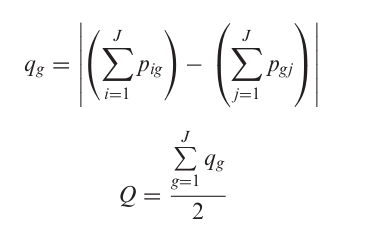

In [1268]:
QD = (np.abs(total_ref - total_class)).sum() / 2
QD

np.float64(0.0763358778625954)

logo erro de alocação é 

In [1251]:
EG - QD

np.float64(0.20763358778625957)

vamos aqui usar pela formula

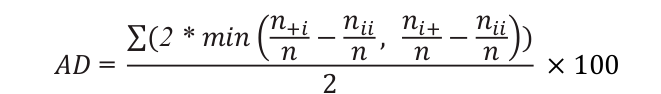

In [1252]:
menor_diferenca = np.minimum((total_class - concordancia), (total_ref - concordancia))
menor_diferenca

1.1. Formação Florestal                0.087023
1.2. Formação Savânica                 0.036641
1.3. Mangue                            0.001527
2.1. Campo Alagado e Área Pantanosa    0.013740
2.2. Formação Campestre (Campo)        0.013740
3.1. Pastagem                          0.047328
3.2. Agricultura                       0.001527
3.4. Mosaico de Usos                   0.000000
4.1. Praia e Duna                      0.000000
4.2. Infraestrutura Urbana             0.001527
5.1. Rio, Lago e Oceano                0.004580
dtype: float64

In [1253]:
AD = ((menor_diferenca * 2).sum() / 2) 
AD

np.float64(0.20763358778625957)

### Indice Kappa

In [1256]:
from sklearn.metrics import cohen_kappa_score

In [1257]:
kappa = cohen_kappa_score(y_true, y_pred)
kappa

np.float64(0.622354341545672)

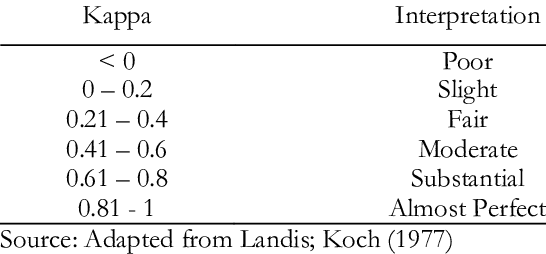

### Com estimativa de área

#### Preparacao

a probabilidade, que é a quantidade de amostras sobre a populacão, e esta salva com ajustes de acordo com o voto em peso_voto

ver os valores antes desse ajuste

In [992]:
df_acc['PESO_VOT'].describe()

count    671.000000
mean       0.000008
std        0.000008
min        0.000005
25%        0.000005
50%        0.000007
75%        0.000007
max        0.000182
Name: PESO_VOT, dtype: float64

In [993]:
biomes = df_acc['BioNB'].unique()
biomes

array(['Amazônia', 'Cerrado'], dtype=object)

acho que é feito por biomas, pq em alguns biomas eles usam dados da validacao no treinamento

aqui eu corrigi o codigo que estava em  https://github.com/mapbiomas-brazil/accuraccy/blob/mapbiomas80/src/estimates_codes/2_accuracy_estimates.py, para de fato excluir as amostras que foram usadas no treinamento. La nao esta excluindo por erro de digitacao, 'treinamento'

In [994]:
for biome in biomes:
        print ("biome", biome)
        biome_filter = (df_acc['BioNB'] == biome)
        n_samples, _ = df_acc[biome_filter & (df_acc['AMOSTRAS'] != 'treinamento')].shape
        t_samples, _ = df_acc[biome_filter].shape
        print ("amostras sem treinamento", n_samples, "amostras com treinamento", t_samples)
        prob_biome_adjs = n_samples / t_samples
        df_acc.loc[biome_filter, 'PESO_VOT'] = df_acc[biome_filter]['PESO_VOT'] * prob_biome_adjs

biome Amazônia
amostras sem treinamento 218 amostras com treinamento 218
biome Cerrado
amostras sem treinamento 453 amostras com treinamento 453


In [995]:
#df_acc = df_acc[df_acc['AMOSTRAS'] != 'Treinamento']

In [996]:
df_acc['PESO_VOT'].describe()

count    671.000000
mean       0.000008
std        0.000008
min        0.000005
25%        0.000005
50%        0.000007
75%        0.000007
max        0.000182
Name: PESO_VOT, dtype: float64

In [997]:
sample_weight = 1 / df_acc[['PESO_VOT']].to_numpy().flatten()
population = sample_weight.sum()


In [998]:
len(sample_weight)

671

In [999]:
population

np.float64(104349378.0841338)

In [1000]:
matrix_ponderada = confusion_matrix(y_true, y_pred, sample_weight=sample_weight/population)

In [1001]:
matrix_ponderada = matrix_ponderada.T
print (matrix_ponderada)

[[3.70392878e-01 4.75967622e-02 5.25925511e-05 0.00000000e+00
  0.00000000e+00 2.04341268e-03 3.32916136e-02 6.80919878e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.81137558e-04 2.72411487e-03]
 [1.70092175e-02 1.00748262e-01 0.00000000e+00 6.80919878e-04
  0.00000000e+00 2.72433255e-03 1.08825752e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.04271990e-02 0.00000000e+00 2.11135229e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.76643915e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.16781135e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.94972712e-02 1.02146689e-02 9.53461974e-03 0.00000000e+00


In [1002]:
if level == 'l1':
    class_names = sorted(class_names)     
    class_values = sorted(class_values)

In [1003]:
df_matriz = pd.DataFrame(matrix_ponderada, columns=class_names, index=class_names)
df_matriz

,1.1. Formação Florestal,1.2. Formação Savânica,1.3. Mangue,3.3. Floresta Plantada,2.1. Campo Alagado e Área Pantanosa,2.2. Formação Campestre (Campo),3.1. Pastagem,3.2. Agricultura,3.4. Mosaico de Usos,4.1. Praia e Duna,4.2. Infraestrutura Urbana,4.4. Outra Área não Vegetada,2.3. Apicum,"5.1. Rio, Lago e Oceano"
1.1. Formação Florestal,0.370393,0.047597,0.000053,0.000000,0.000000,0.002043,0.033292,0.000681,0.000000,0.000000,0.000000,0.000000,0.000681,0.002724
1.2. Formação Savânica,0.017009,0.100748,0.000000,0.000681,0.000000,0.002724,0.010883,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.3. Mangue,0.020427,0.000000,0.021114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3.3. Floresta Plantada,0.000000,0.000000,0.000000,0.004766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.1. Campo Alagado e Área Pantanosa,0.008168,0.000000,0.000000,0.000000,0.039497,0.010215,0.009535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.2. Formação Campestre (Campo),0.000000,0.007492,0.000000,0.000000,0.000000,0.000681,0.003405,0.000000,0.000000,0.000000,0.000000,0.000000,0.000681,0.002031
3.1. Pastagem,0.022475,0.005448,0.000000,0.000000,0.003405,0.005448,0.104811,0.000000,0.000000,0.000000,0.002039,0.000000,0.000000,0.000000
3.2. Agricultura,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000681,0.019061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3.4. Mosaico de Usos,0.002043,0.005448,0.000000,0.000000,0.000000,0.002724,0.000000,0.000000,0.012935,0.000000,0.000000,0.000000,0.000000,0.000000
4.1. Praia e Duna,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025858,0.000000,0.000000,0.000000,0.000000


### Calculo da acuracia

In [1004]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [1005]:
total = df_matriz.sum().sum()
total

np.float64(0.9999999999999993)

In [1006]:
concordancia = np.diag(df_matriz.values)
concordancia

array([0.37039288, 0.10074826, 0.02111352, 0.00476644, 0.03949727,
       0.00068092, 0.10481131, 0.01906061, 0.01293534, 0.02585773,
       0.01360937, 0.008173  , 0.00136228, 0.03197995])

In [1007]:
total_class= df_matriz.sum(axis=1)
total_class

1.1. Formação Florestal                0.457463
1.2. Formação Savânica                 0.132045
1.3. Mangue                            0.041541
3.3. Floresta Plantada                 0.004766
2.1. Campo Alagado e Área Pantanosa    0.067414
2.2. Formação Campestre (Campo)        0.014290
3.1. Pastagem                          0.143627
3.2. Agricultura                       0.019742
3.4. Mosaico de Usos                   0.023152
4.1. Praia e Duna                      0.025858
4.2. Infraestrutura Urbana             0.014971
4.4. Outra Área não Vegetada           0.008173
2.3. Apicum                            0.005444
5.1. Rio, Lago e Oceano                0.041513
dtype: float64

In [1008]:
total_ref = df_matriz.sum(axis=0)
total_ref

1.1. Formação Florestal                0.442558
1.2. Formação Savânica                 0.166734
1.3. Mangue                            0.021166
3.3. Floresta Plantada                 0.005447
2.1. Campo Alagado e Área Pantanosa    0.053117
2.2. Formação Campestre (Campo)        0.025194
3.1. Pastagem                          0.163968
3.2. Agricultura                       0.019742
3.4. Mosaico de Usos                   0.012935
4.1. Praia e Duna                      0.025858
4.2. Infraestrutura Urbana             0.015649
4.4. Outra Área não Vegetada           0.008173
2.3. Apicum                            0.002725
5.1. Rio, Lago e Oceano                0.036735
dtype: float64

In [1009]:
total_concordancia  = concordancia.sum()
total_concordancia

np.float64(0.7549888745027868)

#### Acuracia Global

In [1010]:
AG = total_concordancia
AG

np.float64(0.7549888745027868)

#### Erro Global

In [1011]:
EG = 1 - AG
EG

np.float64(0.24501112549721316)

#### Acuracia do consumidor e erros de comissao

In [1012]:
AC = concordancia / total_class
AC.sort_values(ascending=False)

3.3. Floresta Plantada                 1.000000
4.1. Praia e Duna                      1.000000
4.4. Outra Área não Vegetada           1.000000
3.2. Agricultura                       0.965498
4.2. Infraestrutura Urbana             0.909036
1.1. Formação Florestal                0.809667
5.1. Rio, Lago e Oceano                0.770355
1.2. Formação Savânica                 0.762983
3.1. Pastagem                          0.729747
2.1. Campo Alagado e Área Pantanosa    0.585888
3.4. Mosaico de Usos                   0.558725
1.3. Mangue                            0.508261
2.3. Apicum                            0.250218
2.2. Formação Campestre (Campo)        0.047650
dtype: float64

aqui estou fazendo o equivalente ao micro

In [1013]:
concordancia.sum() / total_class.sum()

np.float64(0.7549888745027874)

Micro: Calcula a métrica globalmente.
Macro: Calcula a métrica para cada classe e depois tira a média.
Weighted: Calcula a métrica para cada classe e tira a média ponderada pelo suporte de cada classe.

In [1014]:
precision_score(y_true, y_pred, average='micro')

np.float64(0.7123695976154992)

In [1015]:
EC = 1 - AC
EC.sort_values(ascending=False)

2.2. Formação Campestre (Campo)        0.952350
2.3. Apicum                            0.749782
1.3. Mangue                            0.491739
3.4. Mosaico de Usos                   0.441275
2.1. Campo Alagado e Área Pantanosa    0.414112
3.1. Pastagem                          0.270253
1.2. Formação Savânica                 0.237017
5.1. Rio, Lago e Oceano                0.229645
1.1. Formação Florestal                0.190333
4.2. Infraestrutura Urbana             0.090964
3.2. Agricultura                       0.034502
3.3. Floresta Plantada                 0.000000
4.1. Praia e Duna                      0.000000
4.4. Outra Área não Vegetada           0.000000
dtype: float64

In [1016]:
1 - concordancia.sum() / total_class.sum()

np.float64(0.2450111254972126)

#### Acuracia do produtor e erros de omissao

In [1017]:
AP = concordancia / total_ref
AP.sort_values(ascending=False)

3.4. Mosaico de Usos                   1.000000
4.1. Praia e Duna                      1.000000
4.4. Outra Área não Vegetada           1.000000
1.3. Mangue                            0.997515
3.2. Agricultura                       0.965508
3.3. Floresta Plantada                 0.875000
5.1. Rio, Lago e Oceano                0.870554
4.2. Infraestrutura Urbana             0.869681
1.1. Formação Florestal                0.836936
2.1. Campo Alagado e Área Pantanosa    0.743587
3.1. Pastagem                          0.639219
1.2. Formação Savânica                 0.604245
2.3. Apicum                            0.500000
2.2. Formação Campestre (Campo)        0.027027
dtype: float64

In [1018]:
concordancia.sum() / total_ref.sum()

np.float64(0.7549888745027874)

In [1019]:
recall_score(y_true, y_pred, average='micro')

np.float64(0.7123695976154992)

In [1020]:
EO = 1 - AP
EO

1.1. Formação Florestal                0.163064
1.2. Formação Savânica                 0.395755
1.3. Mangue                            0.002485
3.3. Floresta Plantada                 0.125000
2.1. Campo Alagado e Área Pantanosa    0.256413
2.2. Formação Campestre (Campo)        0.972973
3.1. Pastagem                          0.360781
3.2. Agricultura                       0.034492
3.4. Mosaico de Usos                   0.000000
4.1. Praia e Duna                      0.000000
4.2. Infraestrutura Urbana             0.130319
4.4. Outra Área não Vegetada           0.000000
2.3. Apicum                            0.500000
5.1. Rio, Lago e Oceano                0.129446
dtype: float64

#### F1 Score

In [1021]:
f1_score(y_true, y_pred, average='micro')

np.float64(0.7123695976154992)

#### Erro de quantidade (area disagrement)



In [1022]:
QD = (np.abs(total_ref - total_class)).sum() / 2
QD

np.float64(0.0672915181379014)

logo erro de alocação é 

In [1023]:
EG - QD

np.float64(0.17771960735931175)

In [1024]:
menor_diferenca = np.minimum((total_class - concordancia), (total_ref - concordancia))
menor_diferenca

1.1. Formação Florestal                0.072165
1.2. Formação Savânica                 0.031297
1.3. Mangue                            0.000053
3.3. Floresta Plantada                 0.000000
2.1. Campo Alagado e Área Pantanosa    0.013620
2.2. Formação Campestre (Campo)        0.013609
3.1. Pastagem                          0.038816
3.2. Agricultura                       0.000681
3.4. Mosaico de Usos                   0.000000
4.1. Praia e Duna                      0.000000
4.2. Infraestrutura Urbana             0.001362
4.4. Outra Área não Vegetada           0.000000
2.3. Apicum                            0.001362
5.1. Rio, Lago e Oceano                0.004755
dtype: float64

In [1025]:
AD = ((menor_diferenca * 2).sum() / 2) 
AD

np.float64(0.17771960735931103)

### Indice Kappa

In [1026]:
from sklearn.metrics import cohen_kappa_score

In [1027]:
kappa = cohen_kappa_score(y_true, y_pred)
kappa

np.float64(0.6226118733170919)

## Visualização geográfica

In [846]:
df_acc.columns

Index(['system:index', 'AMOSTRAS', 'AMOSTRA_AM', 'BioNB', 'CARTA_2',
       'CLASS_2022', 'DECLIVIDAD', 'LAT', 'LON', 'NEW_PROB', 'NEW_WEIGHT',
       'PESO_VOT', 'PROB_AMOS2', 'StateNB', 'TARGETID', 'VAL_PESO',
       'classification', 'reference', 'year', '.geo', 'strata_id', 'pop',
       'n_samp'],
      dtype='object')

In [848]:
import geopandas as gpd
from shapely.geometry import Point

In [849]:
geometry = [Point(xy) for xy in zip(df_acc['LON'], df_acc['LAT'])]

In [852]:
gdf = gpd.GeoDataFrame(df_acc, geometry=geometry)

In [857]:
# Definindo o sistema de coordenadas (CRS) - aqui, WGS84 (epsg:4326)
gdf.set_crs(epsg=4326, inplace=True)

,system:index,AMOSTRAS,AMOSTRA_AM,BioNB,CARTA_2,CLASS_2022,DECLIVIDAD,LAT,LON,NEW_PROB,...,TARGETID,VAL_PESO,classification,reference,year,.geo,strata_id,pop,n_samp,geometry
0,0000000000000000508d_0,NaN,0,Amazônia,SA-23-Z,APICUM,D2,-2.368226,-43.544883,0.000011,...,12037,1.000000,3,32,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D2,27861902.0,305,POINT (-43.54488 -2.36823)
1,00000000000000004b0e_0,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.951507,-44.961886,0.000012,...,16624,1.000000,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303,POINT (-44.96189 -3.95151)
2,00000000000000004b0f_0,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.691714,-44.849776,0.000012,...,16625,1.000000,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303,POINT (-44.84978 -3.69171)
3,00000000000000004b1b_0,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.823672,-44.723653,0.000012,...,16656,1.000000,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303,POINT (-44.72365 -2.82367)
4,00000000000000004b26_0,Treinamento,1,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.720550,-44.673527,0.000012,...,16694,1.000000,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303,POINT (-44.67353 -3.72055)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,000000000000000050b6_0,NaN,0,Cerrado,SA-23-Z,FORMAÇÃO SAVÂNICA,D2,-2.826906,-42.711876,0.000011,...,2407,1.000000,4,4,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D2,27861902.0,305,POINT (-42.71188 -2.82691)
708,00000000000000005101_0,NaN,0,Cerrado,SA-23-Z,PASTAGEM,D2,-3.474232,-43.978770,0.000011,...,17349,1.000000,4,15,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D2,27861902.0,305,POINT (-43.97877 -3.47423)
709,0000000000000000506b_0,NaN,0,Cerrado,SA-23-Z,PRAIA E DUNA,D2,-2.483840,-43.042815,0.000011,...,17080,0.333333,23,23,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D2,27861902.0,305,POINT (-43.04281 -2.48384)
710,00000000000000004b5b_0,Treinamento,1,Amazônia,SA-23-Z,"RIO, LAGO E OCEANO",D1,-3.246240,-44.985601,0.000012,...,16800,0.333333,33,33,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303,POINT (-44.9856 -3.24624)


In [858]:
gdf_erros = gdf[gdf['classification'] != gdf['reference']]
gdf_erros.shape

(234, 24)

In [864]:
gdf_erros.drop('system:index', axis=1, inplace=True)

KeyError: "['system:index'] not found in axis"

In [868]:
gdf_erros.drop('.geo', axis=1, inplace=True)

/tmp/ipykernel_671205/1334426410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_erros.drop('.geo', axis=1, inplace=True)


In [869]:
gdf_erros

,AMOSTRAS,AMOSTRA_AM,BioNB,CARTA_2,CLASS_2022,DECLIVIDAD,LAT,LON,NEW_PROB,NEW_WEIGHT,...,StateNB,TARGETID,VAL_PESO,classification,reference,year,strata_id,pop,n_samp,geometry
0,NaN,0,Amazônia,SA-23-Z,APICUM,D2,-2.368226,-43.544883,0.000011,55301.697925,...,21.0,12037,1.000000,3,32,2022,SA-23-Z_D2,27861902.0,305,POINT (-43.54488 -2.36823)
2,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.691714,-44.849776,0.000012,60305.967634,...,21.0,16625,1.000000,6,11,2022,SA-23-Z_D1,25366123.0,303,POINT (-44.84978 -3.69171)
4,Treinamento,1,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.720550,-44.673527,0.000012,60305.967634,...,21.0,16694,1.000000,6,11,2022,SA-23-Z_D1,25366123.0,303,POINT (-44.67353 -3.72055)
11,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.357986,-44.703171,0.000012,60305.967634,...,21.0,16769,1.000000,32,11,2022,SA-23-Z_D1,25366123.0,303,POINT (-44.70317 -2.35799)
13,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.705998,-44.855975,0.000012,60305.967634,...,21.0,16804,1.000000,33,11,2022,SA-23-Z_D1,25366123.0,303,POINT (-44.85597 -3.706)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,NaN,0,Cerrado,SA-23-Z,"RIO, LAGO E OCEANO",D1,-3.620029,-43.614413,0.000012,60305.967634,...,21.0,223,0.500000,3,33,2022,SA-23-Z_D1,25366123.0,303,POINT (-43.61441 -3.62003)
695,Treinamento,1,Amazônia,SA-23-Z,FORMAÇÃO FLORESTAL,D1,-2.527767,-44.997729,0.000012,60305.967634,...,21.0,16779,0.333333,6,3,2022,SA-23-Z_D1,25366123.0,303,POINT (-44.99773 -2.52777)
696,Treinamento,1,Amazônia,SA-23-Z,FORMAÇÃO FLORESTAL,D1,-3.057055,-44.042101,0.000012,60305.967634,...,21.0,16796,0.333333,6,3,2022,SA-23-Z_D1,25366123.0,303,POINT (-44.0421 -3.05705)
697,NaN,0,Amazônia,SA-23-Z,FORMAÇÃO FLORESTAL,D2,-2.551752,-44.899094,0.000011,55301.697925,...,21.0,17083,0.333333,6,3,2022,SA-23-Z_D2,27861902.0,305,POINT (-44.89909 -2.55175)


<Axes: >

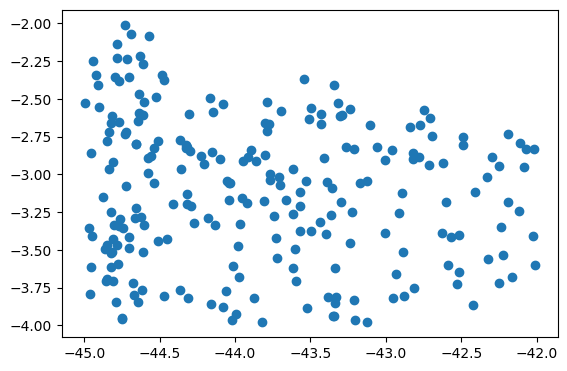

In [870]:
gdf_erros.plot()

In [871]:
gdf_erros.to_file("pontos_amostrais_erro.shp")

/tmp/ipykernel_671205/2278385486.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_erros.to_file("pontos_amostrais_erro.shp")
/home/scosta/dev/acuracia_ma/.venv/lib/python3.10/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'classification' to 'classifica'
  ogr_write(
